# Graduate Admission 

In this study, we are going to have a look on the impact of the factors on the admission to American Universities. 

Here are the factors given by the database :

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

## Pre-processing

Import Librairies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Import Dataset

In [2]:
dataset = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.shape

(500, 9)

We have 9 variables for 500 observations

In [5]:
#% de valeurs manquantes
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
missing_value_df["percent_missing"]

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
Name: percent_missing, dtype: float64

Good point, we have no missing values

In [6]:
dataset.describe(include = "all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
dataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

The variables Serial No. brings no usefull information, thus we remove it. 

Also Chance of Admit is a probability, to make it easier, we'll convert it into a binary variable. For the probabilities higher or eaqual to 75%, we'll consider it as 1 (meaning they have a chance to be admitted). If the probabilities are lower, it will be a 0. 

In [8]:
dataset = dataset.drop("Serial No.", axis=1)

In [9]:
dataset.iloc[:, -1] = dataset.iloc[:, -1].apply(lambda x: 1 if x>=0.75 else 0)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [10]:
dataset.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

## Data viz

In this section we will look at the variables and their relationship with the Chance of being admited

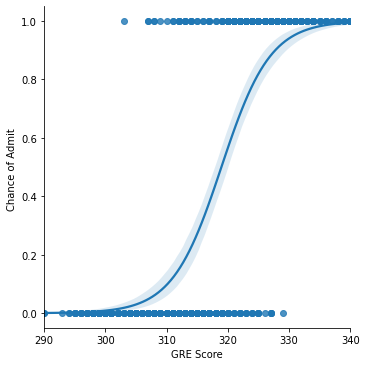

In [11]:
sns.lmplot(x=dataset.columns[0], 
           y=dataset.columns[-1], 
           data=dataset,
           logistic=True)

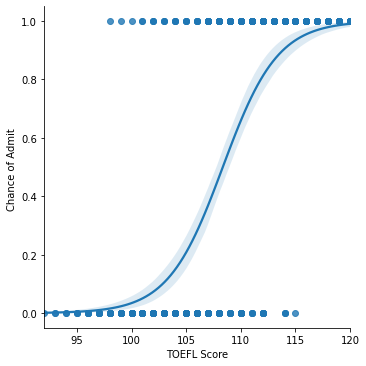

In [12]:
sns.lmplot(x=dataset.columns[1], 
           y=dataset.columns[-1], 
           data=dataset,
           logistic=True)

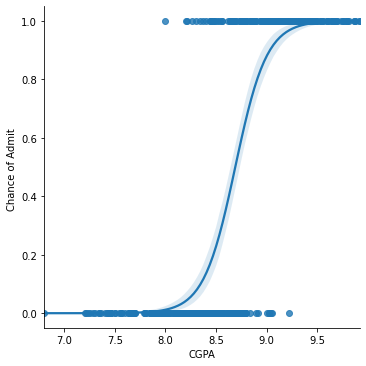

In [13]:
sns.lmplot(x=dataset.columns[5], 
           y=dataset.columns[-1], 
           data=dataset,
           logistic=True)

For the moment, we can clearly see that the chance of being Admited increases with the scores.

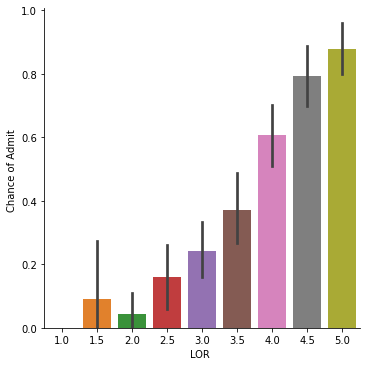

In [14]:
sns.catplot(x=dataset.columns[4], 
           y=dataset.columns[-1], 
           data=dataset,
           kind="bar")

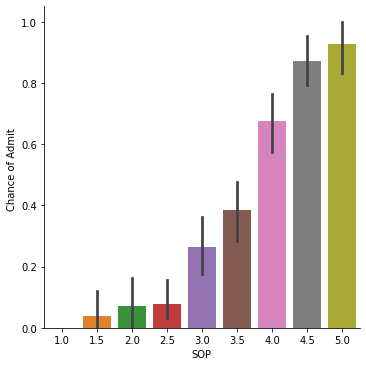

In [15]:
sns.catplot(x=dataset.columns[3], 
           y=dataset.columns[-1], 
           data=dataset,
           kind="bar")

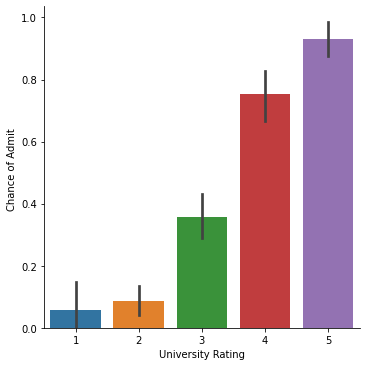

In [16]:
sns.catplot(x=dataset.columns[2],
            y=dataset.columns[-1],
            data=dataset,
            kind="bar")

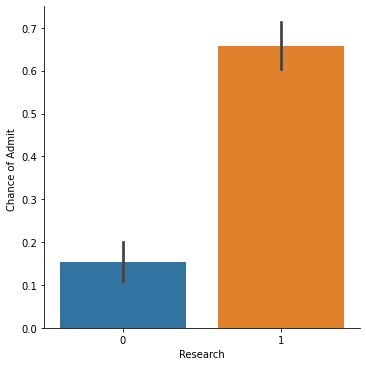

In [17]:
sns.catplot(x=dataset.columns[-2],
            y=dataset.columns[-1],
            data=dataset,
            kind="bar")

The better the LOR & the SOP the better are the chances to be admitted
Also our catplot regarding the ranking of the university demonstrates that the higher the ranking (1) the less chance the students have to be accepted.
Finally, if they have some experience as a researcher, the chances to be admitted increases a lot.

## Test Part

In [18]:
#Pour controler la répartition des données
for col in dataset.columns : 
    print(dataset[col].value_counts())

312    24
324    23
316    18
321    17
327    17
322    17
320    16
314    16
311    16
317    15
325    15
315    13
323    13
308    13
304    12
326    12
313    12
300    12
318    12
319    12
305    11
310    11
301    11
307    10
299    10
298    10
329    10
328     9
331     9
340     9
309     9
330     8
332     8
334     8
306     7
302     7
297     6
303     5
296     5
295     5
336     5
338     4
333     4
335     4
339     3
294     2
290     2
337     2
293     1
Name: GRE Score, dtype: int64
110    44
105    37
104    29
106    28
107    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
113    19
108    19
109    19
114    18
116    16
115    11
98     10
118    10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5  

In [19]:
#Definition of X & y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

Train-test split with 30% 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0, stratify = y)

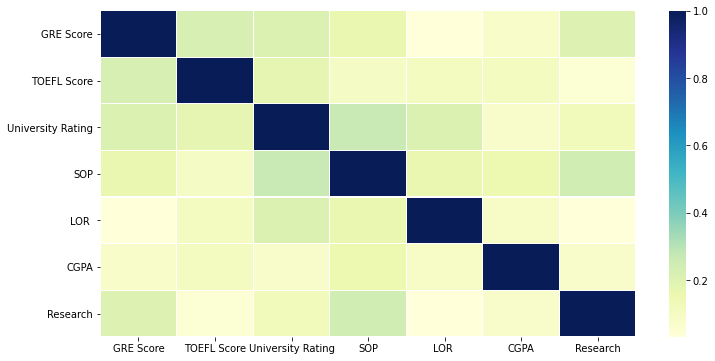

In [21]:
plt.figure(figsize=(12, 6))
df_corr = X.apply(lambda x: pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr(), xticklabels=X.columns, yticklabels=X.columns, 
                 linewidths=.2, cmap="YlGnBu")

Variables don't seem to be correlated which is good as they will not bring the same information

In [22]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [23]:
# Create pipeline for numeric features
numeric_features = [0,1,2,3,4,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])
# Create pipeline for categorical features
categorical_features =  [6] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')) # missing values will be replaced by most frequent value
    
    ])
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [24]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test) 

## Machine Learning

### Log regression

In [53]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-5, 5, 20),
    'solver' : ['liblinear'] }]
clf_LR = RandomizedSearchCV(LogisticRegression(), param_distributions = param_grid, n_iter=20, cv = 5, refit=True,verbose=1, n_jobs=-1,)
best_clf_LR = clf_LR.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
y_pred = best_clf_LR.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
print("accuracy is :",accuracy_log)
print("precision is :",precision_log)
print("recall is :",recall_log)

accuracy is : 0.8733333333333333
precision is : 0.859375
recall is : 0.8461538461538461


Text(91.68, 0.5, 'predicted label')

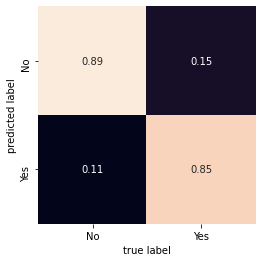

In [27]:
mat = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

Great score for the accuracy and the recall. However we have bad precision as we have quite a lot of false positives.

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

param_rf={"n_estimators": np.arange(10,50),
        "max_depth": np.arange(1,10),
        "min_samples_split":np.arange(2,10)}
clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = param_rf,
                         n_iter=50, cv = 5, refit=True,verbose=1,random_state=0, n_jobs=-1,)
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [56]:
y_pred = best_clf.predict(X_test)
accuracy_rand = accuracy_score(y_test, y_pred)
precision_rand = precision_score(y_test, y_pred)
recall_rand = recall_score(y_test, y_pred)
print("accuracy is :",accuracy_rand)
print("precision is :",precision_rand)
print("recall is :",recall_rand)

accuracy is : 0.86
precision is : 0.8142857142857143
recall is : 0.8769230769230769


Text(91.68, 0.5, 'predicted label')

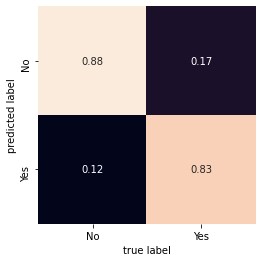

In [30]:
mat = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

Here we see that we have a better precision evethough accuracy and recall diminished a bit.

In [31]:
feature_importance = pd.DataFrame({"features": dataset.columns[:-1], "score":best_clf.best_estimator_.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance

,features,score
5,CGPA,0.613991
0,GRE Score,0.135605
3,SOP,0.072175
6,Research,0.063734
4,LOR,0.056195
1,TOEFL Score,0.031230
2,University Rating,0.027069


The most important features in the random forest according to the training set X_train are the CGPA, Toefl and Gre. The others seem to have really low impact on the model. We'll see if we can get rid of them later

### SVM

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC
param_grid = {'C': np.arange(0.001,50,0.5),
              'gamma': np.arange(0.001,10,0.5),
              'kernel': ['rbf']} 

grid = GridSearchCV(SVC(probability=True), param_grid, refit = True,verbose = 0)

grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
import joblib
joblib.dump(grid.best_estimator_,"gridfile")

In [57]:
import joblib
grid = joblib.load('gridfile')

In [58]:
y_pred = grid.predict(X_test)
accuracy_grid= accuracy_score(y_test, y_pred)
precision_grid = precision_score(y_test, y_pred)
recall_grid = recall_score(y_test, y_pred)
print("accuracy is :",accuracy_grid)
print("precision is :",precision_grid)
print("recall is :",recall_grid)

accuracy is : 0.8733333333333333
precision is : 0.8709677419354839
recall is : 0.8307692307692308


Text(91.68, 0.5, 'predicted label')

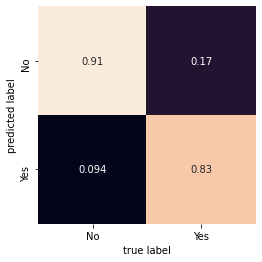

In [36]:
mat = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

Here, we have a better accuracy, a better precision however a slightly lower recall. Therefore, we have higher false negatives but lower false postives

### XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xgc_clf=xgb.XGBClassifier(learning_rate=0.02,objective='binary:logistic')
parameters = { 'model__min_child_weight': [1, 5, 10],
        'model__gamma': [0.5, 1, 1.5, 2, 5],
        'model__subsample': [0.6, 0.8, 1.0],
        'model__colsample_bytree': [0.6, 0.8, 1.0],
        'model__max_depth': [3, 4, 5],
        'model__random_state' : [0],
        'n_estimators': [1000]
}
classifier_xgb = GridSearchCV(xgc_clf, parameters, scoring='roc_auc', verbose=1, cv=6)
classifier_xgb = classifier_xgb.fit(X_train, y_train)

In [ ]:
classifier_xgb = joblib.dump(classifier_xgb.best_estimator_,"xgbgraduate")

In [59]:
xgb = joblib.load("xgbgraduate")

In [60]:
y_pred = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
print(accuracy_xgb)
print(precision_xgb)
print(recall_xgb)

0.8066666666666666
0.7647058823529411
0.8


### Extra Trees Classifier

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

kfold = KFold(n_splits = 100)
num_trees = 150
max_features = 3
model = ExtraTreesClassifier(n_estimators = num_trees, max_features = max_features,random_state=0)

In [62]:
results = cross_val_score(model, X_train, y_train, cv = kfold)
print(results.mean())

0.87


In [63]:
model = model.fit(X_train,y_train)

In [64]:
y_pred = model.predict(X_test)
accuracy_etc = accuracy_score(y_test, y_pred)
precision_etc = precision_score(y_test, y_pred)
recall_etc = recall_score(y_test, y_pred)
print(accuracy_etc)
print(precision_etc)
print(recall_etc)

0.86
0.8142857142857143
0.8769230769230769


Text(91.68, 0.5, 'predicted label')

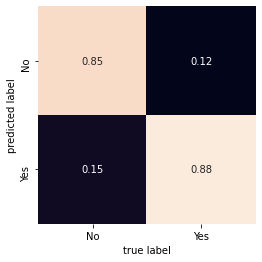

In [43]:
mat = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

### Results summary

In [65]:
import seaborn as sns

In [76]:
x_ax = ["Logistic","Rand_Forest","SVM","XGBoost","Extra_tree"]

In [77]:
y_ax=[accuracy_log,accuracy_rand,accuracy_grid,accuracy_xgb,accuracy_etc]

Text(0.5, 0, 'Accuracy')

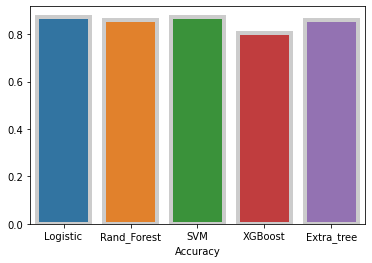

In [78]:
sns.barplot(x=x_ax,y=y_ax,linewidth=4,edgecolor="0.8")
plt.xlabel('Accuracy')

Text(0.5, 0, 'Precision')

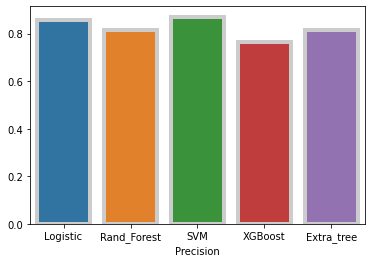

In [79]:
y_ax=[precision_log,precision_rand,precision_grid,precision_xgb,precision_etc]
sns.barplot(x=x_ax,y=y_ax,linewidth=4,edgecolor="0.8")
plt.xlabel('Precision')

Text(0.5, 0, 'Recall')

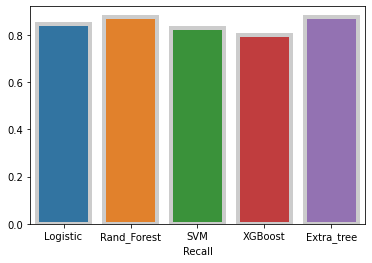

In [80]:
y_ax=[recall_log,recall_rand,recall_grid,recall_xgb,recall_etc]
sns.barplot(x=x_ax,y=y_ax,linewidth=4,edgecolor="0.8")
plt.xlabel('Recall')

Here, a question must be answered in order to select the best model. If i were to make prediction about the probabilities a student has to go to a university, would I prefer to minimize false negative or false positive ?

In this case, I would prefer to minimize the number of times I predict a student will not go to university but finally, he goes. In deed, let's imagine that I give advice based on my predictions and students stictly follow them. Of course i would prefer to not make mistake but our results show that it is impossible thus, I have the opportunity to decide the type of errors i prefer to make. I'd rather tell a student to apply for university because predictions say so and he's eventually rejected than the opposite.

This is why we want to minimize false negative then, we want to maximize the recall.

Here the model giving us the highest score on recall is the extra_tree. Therefore, we'll use this one for our future predictions
